### Informacion de la libreria

https://pynq.readthedocs.io/en/v2.5/_modules/pynq/lib/dma.html

In [1]:
from pynq import pl

import numpy as np
import pandas as pd
from pynq import allocate
from pynq import Overlay
import matplotlib.pyplot as plt


In [9]:
overlay = Overlay('/home/xilinx/jupyter_notebooks/adc_dma/adc_dma.bit')

In [10]:
# overlay.ip_dict

In [11]:
dma = overlay.axi_dma
dma_recv = dma.recvchannel

In [12]:
input_buffer = allocate(shape=(256,), dtype=np.uint16)

/tmp/ipykernel_887/3703012207.py:18: RuntimeWarning: coroutine '_SDMAChannel.wait_async' was never awaited
  dma_recv.wait_async()


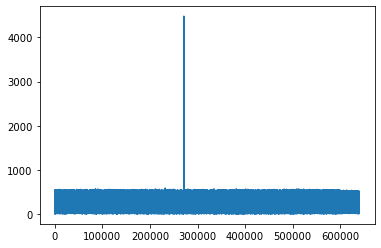

In [17]:
y = np.array([0])
#dma_recv._mmio.write(0x34, 0x01)
#startStatus = dma.recvchannel.start()
recvstatus = dma_recv.running
idlestatus = dma_recv.idle
#print("startStatus = ", startStatus)
#print("recvstatus = ", recvstatus)
#print("idlestatus = ", idlestatus)


dma.buffer_max_size

for i in range(0,2500):

    dma_recv.transfer(input_buffer)
    #recvstatus = dma_recv.running
    #idlestatus = dma_recv.idle
    dma_recv.wait_async()
    
    y = np.append(y,input_buffer)
    #dma.recvchannel.wait()

plt.plot(y)

#print(y)

#startStatus = dma.recvchannel.stop()
#print("startStatus = ", startStatus)

# input_buffer.close()
         
         

In [ ]:
y_data = pd.DataFrame(np.array(y))
y_data.to_csv("Datos03.csv")